In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon, t
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame

In [10]:
x = np.loadtxt(r"oldfaithful.txt")
n = np.size(x)
nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.mean(bootstrapsample, axis=0)
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall:',d)

Vertrauensintervall: [201.57693015 217.44365809]


In [11]:
x = np.loadtxt(r"oldfaithful.txt")
n = np.size(x)
nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.median(bootstrapsample, axis=0)
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall:',d)

Vertrauensintervall: [229.5 246.5]


In [108]:
x = np.loadtxt(r"oldfaithful.txt")
n = x.size
nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.mean(bootstrapsample, axis=0) - np.mean(x)
l = 0
u = np.sum(np.abs(xbarstar) > 5)
ratio = (l+u)/nboot
print(ratio)

0.232


In [110]:
np.sqrt(100/12)

2.886751345948129

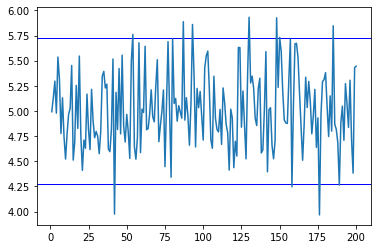

In [123]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
n = 60 # Anzahl Stichproben
# X_1,...,X_n simulieren und in einer
# n-spaltigen Matrix (mit 200 Zeilen) anordnen
sim = uniform.rvs(size=200*n, loc=0, scale=10)
sim = sim.reshape(200, n)
#In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean(axis=1)
plt.axhline(y=5.73, linewidth=1, color='b')
plt.axhline(y=4.27, linewidth=1, color='b')
plt.plot(np.arange(1,201,1),sim_mean)

In [136]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
n = 60
sim = uniform.rvs(size=200*n, loc=0, scale=10)
sim = sim.reshape(200, n)
d = np.sum(sim_mean>5.73) + np.sum(sim_mean<4.27)
print(d)


11


((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

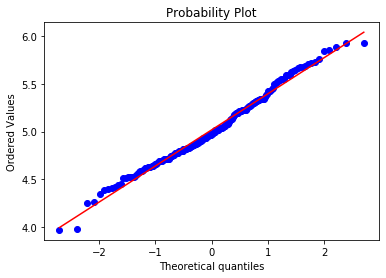

In [138]:
from scipy.stats import probplot
probplot(sim_mean, plot=plt)

0.252

In [141]:
norm.ppf(q=[0.005, 0.995], loc=31, scale=6/np.sqrt(1000))

array([30.51127075, 31.48872925])

In [146]:
t.interval(alpha=0.95, loc=-403, scale=3.127/np.sqrt(9), df=8)

(-404.93826890444467, -401.06173109555533)

# 7.5

In [153]:
x = Series([520, 512, 499, 524, 505])
print(x.mean())
t.ppf(q=0.95, df=x.size-1, loc=500, scale=x.std()/np.sqrt(x.size))

t.ppf(q=0.95, loc=500, df=4, scale=x.std()/np.sqrt(5))

512.0


509.8388828578604

In [155]:
t.interval(alpha=0.95, loc=x.mean(), scale=x.std()/np.sqrt(x.size), df=x.size-1)

(499.1861719188852, 524.8138280811148)